In [4]:
import os
import json
import pandas as pd
import numpy as np
import tensorflow as tf
import random
import matplotlib.pyplot as plt
from mplsoccer import Pitch
from tqdm.notebook import tqdm

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Dense, ReLU, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint, TerminateOnNaN, ReduceLROnPlateau, EarlyStopping, CSVLogger
import shap
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import timedelta

1/1 [==============================] - 0s 90ms/step


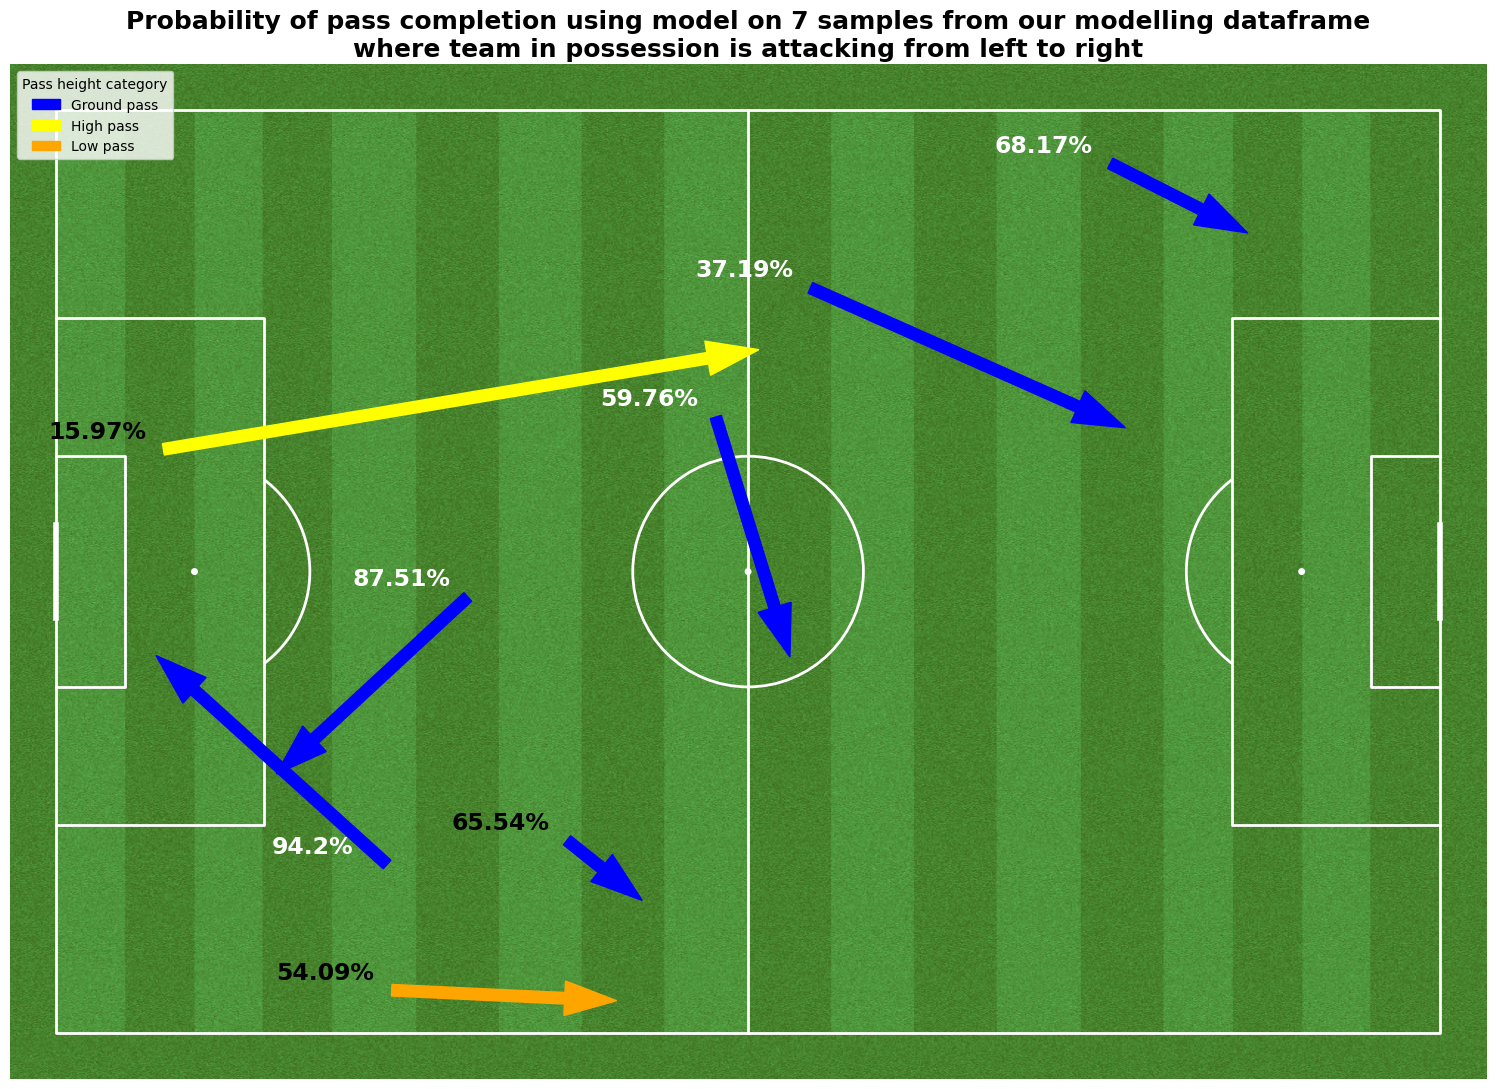

In [5]:
model = load_model("../model/pass_model.hdf5")
modelling_df = pd.read_pickle("../data/modelling_df_city.pkl")


samples = modelling_df.sample(8, random_state=64).reset_index(drop=True)
samples['model_prob_success'] = model.predict(np.array(samples.iloc[:, 1:-1])).tolist()
pitch = Pitch(pitch_color='grass', line_color='white', stripe=True)
fig, ax = pitch.draw()

fig.set_size_inches(18, 11)
for index, row in samples.iterrows():
    player_x =  row['passing_player_x_location']
    player_y = row['passing_player_y_location']
    ball_end_x = row['pass_end_location_x']
    ball_end_y = row['pass_end_location_y']
    model_prob_success = round(row['model_prob_success'][0]*100, 2)
    colour = 'blue' if row['ground_pass'] == 1 else 'orange' if row['low_pass'] == 1 else 'yellow'
    true_colour = "white" if row['completed'] == 1 else "black"
    label = 'Ground pass' if row['ground_pass'] == 1 else 'Low pass' if row['low_pass'] == 1 else 'High pass'
    completed = 1 if row['completed'] ==  1 else 0
    ax.arrow(
        x=player_x, 
        y=player_y, 
        dx=ball_end_x - player_x, 
        dy=ball_end_y - player_y,
        width=1, 
        color=colour,
        label=label,
    )
    ax.annotate(
        f"{model_prob_success}%", 
        xy=(player_x - 10, player_y + 1), 
        color=true_colour,
        size=17,
        weight='bold'
    )
ax.set_title(
    "Probability of pass completion using model on 7 samples from our modelling dataframe\n"
    "where team in possession is attacking from left to right",
    size=18,
    weight='bold'
)
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), title="Pass height category", loc='upper left')
plt.gca().invert_yaxis()
fig.savefig(f"pass_probabilities.png", bbox_inches="tight")

1/1 [==============================] - 0s 72ms/step


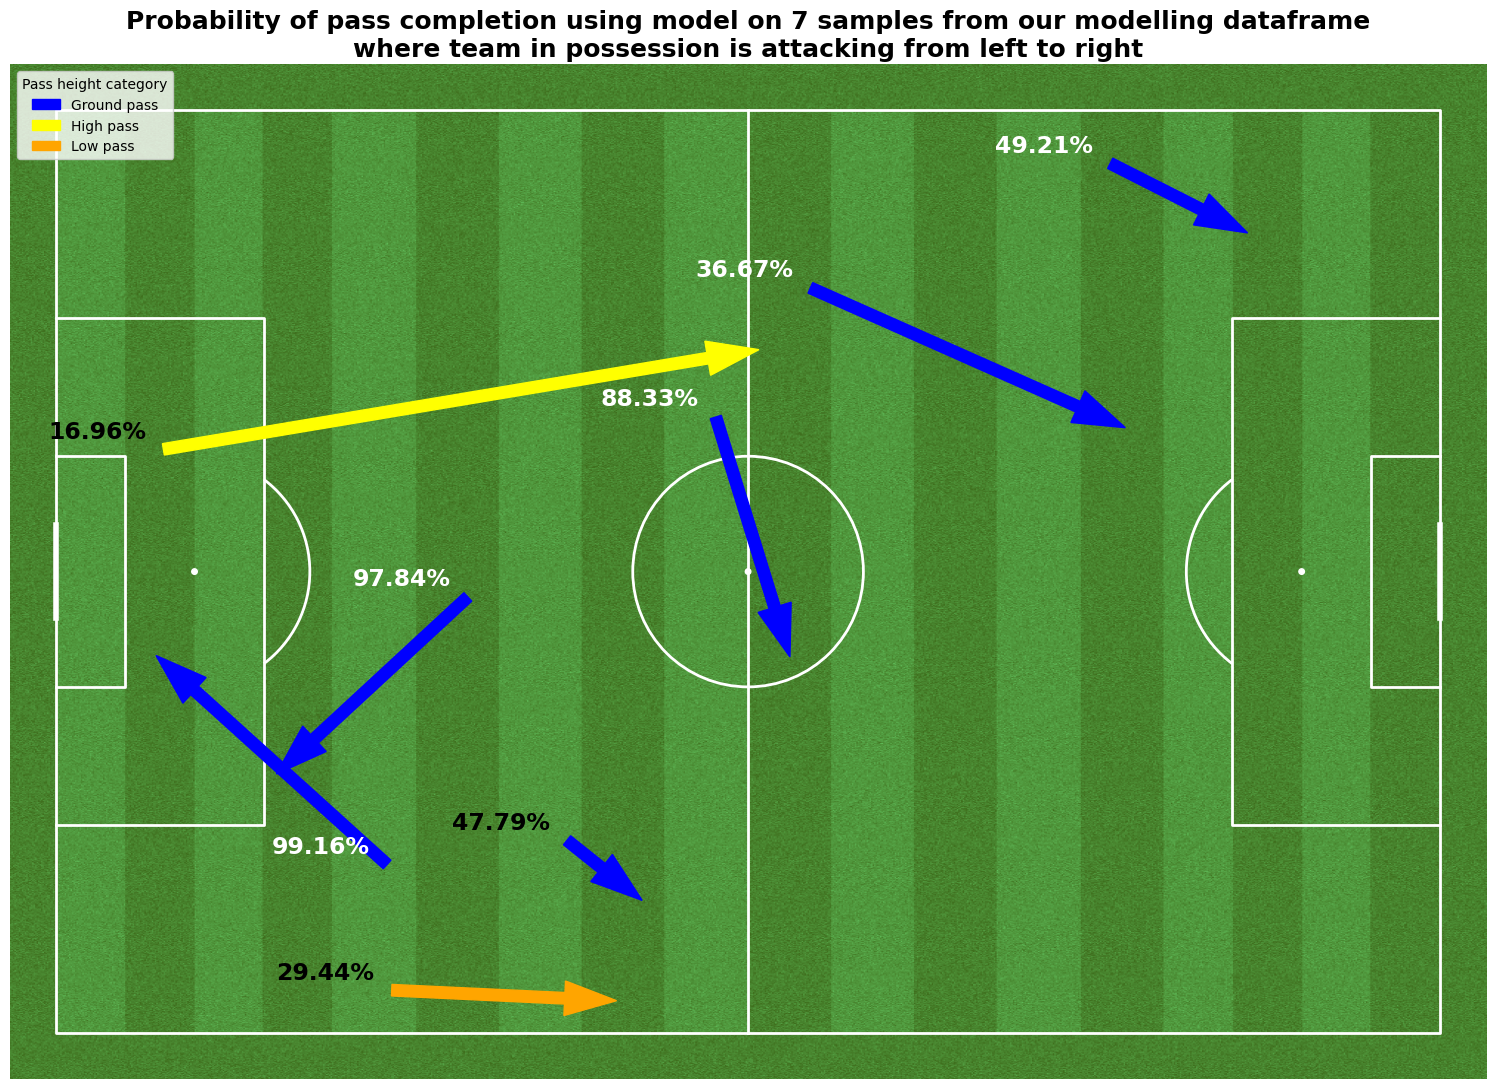

In [6]:
model = load_model("../model/pass_model_all_data_stastbomb.hdf5")
modelling_df = pd.read_pickle("../data/modelling_df_city.pkl")


samples = modelling_df.sample(8, random_state=64).reset_index(drop=True)
samples['model_prob_success'] = model.predict(np.array(samples.iloc[:, 1:-1])).tolist()
pitch = Pitch(pitch_color='grass', line_color='white', stripe=True)
fig, ax = pitch.draw()

fig.set_size_inches(18, 11)
for index, row in samples.iterrows():
    player_x =  row['passing_player_x_location']
    player_y = row['passing_player_y_location']
    ball_end_x = row['pass_end_location_x']
    ball_end_y = row['pass_end_location_y']
    model_prob_success = round(row['model_prob_success'][0]*100, 2)
    colour = 'blue' if row['ground_pass'] == 1 else 'orange' if row['low_pass'] == 1 else 'yellow'
    true_colour = "white" if row['completed'] == 1 else "black"
    label = 'Ground pass' if row['ground_pass'] == 1 else 'Low pass' if row['low_pass'] == 1 else 'High pass'
    completed = 1 if row['completed'] ==  1 else 0
    ax.arrow(
        x=player_x, 
        y=player_y, 
        dx=ball_end_x - player_x, 
        dy=ball_end_y - player_y,
        width=1, 
        color=colour,
        label=label,
    )
    ax.annotate(
        f"{model_prob_success}%", 
        xy=(player_x - 10, player_y + 1), 
        color=true_colour,
        size=17,
        weight='bold'
    )
ax.set_title(
    "Probability of pass completion using model on 7 samples from our modelling dataframe\n"
    "where team in possession is attacking from left to right",
    size=18,
    weight='bold'
)
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), title="Pass height category", loc='upper left')
plt.gca().invert_yaxis()
fig.savefig(f"pass_probabilities.png", bbox_inches="tight")